# Model 
Model zur Preisvorhersage von Gebrauchtwagen.

---------
Als erstes Importiere ich nötigee Frameworks mit welchen ich arbeite. Zusätzlich dazu noch mein Datensatz. 

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df = pd.read_csv("bmw-dataset/bmw.csv", sep=',',  engine='python')
df.head(10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


## Spalte "Kategorie"
Um die Modelle noch besser zu differenzieren habe ich eine neue Spalte Kategorie hinzugefügt. welche durch eine Funktion die richtige Kategorie zu dem BMW-Modell hinzufügt. 

In [152]:
def kategorisieren(modell):
    if isinstance(modell, str):  
        modell = modell.strip() 
        if modell in ["X1", "X2", "X3", "X4", "X5", "X6", "X7"]:
            return "SUV"
        elif modell in ["2 Series", "4 Series", "6 Series", "8 Series"]:
            return "Coupé"
        elif modell in ["Z3", "Z4"]:
            return "Roadster"
        elif modell in ["i3", "i8"]:
            return "Elektro"
        elif modell in ["M2", "M3", "M4", "M5", "M6"]:
            return "Sportwagen"
        elif modell in ["1 Series"]:
            return "Kompaktklasse"
        elif modell == "3 Series":
            return "Mittelklasse"
        elif modell == "5 Series":
            return "Obere Mittelklasse"
        elif modell in ["7 Series", "8 Series"]:
            return "Luxus"
        else:
            return "Unbekannt"
    else:
        return "Unbekannt"


df["Kategorie"] = df["model"].apply(kategorisieren)


df.to_csv("autos_mit_kategorie.csv", index=False)

df = df[(df['price'] > 1000) & (df['price'] < 80000)]



In [173]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Kategorie
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Obere Mittelklasse
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Coupé
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,Obere Mittelklasse
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Kompaktklasse
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,Luxus
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0,Obere Mittelklasse
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0,Obere Mittelklasse
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5,Coupé
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0,Coupé
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0,Obere Mittelklasse


## kategorial in numerische Werte umwandeln 
Um besser arbeiten zu können muss ich die kategorischen Werte in meinem Datensatz in numerische Umwandeln 

In [153]:
df_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType', 'Kategorie'])


## Test und Train
Den Test und Train Datensatz bestimmen. Im Test Datensatz entferne ich die Targetvariable, weil diese ja bestimmt werden soll.
- X = Features
- Y = Target


In [154]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


## Datensatz Teilen
Den Datensatz teile ich in einen Test und einen Train Teil, wobei der Train-Teil grösser ist. Ich nehme 20 % (0,2) des Datensatzes als Test-Teil.

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Auswahl Algorithmus
Um mich für eine Skalierungsmethode zu entscheiden, habe ich einer KI mein Anwendungsfall für das Model und meinen Datensatz beschrieben. Empfohlen wurde mir die "random forest Regression" welche mit mehreren decision trees arbeitet. Jeder decision tree hat eine andere Teilmenge des Datensatzes. Aus den verschiedenen Ergebnissen wird der Durchschnitt genommen und als finales Ergebnis ausgegeben. Diese Methode klingt simpel und eignet sich gut für eine Preisvorhersage.

## Model Trainieren
Als letztes wird das Model trainier und die Ergebnisse ausgegeben. Der MAE gibt die differenz zwischen den beiden Werten an. Ein MAE von 1600.- heisst dass dass Model jeweils 1600 Euro danebenliegt, was Oke ist aber sicher besser geht. 

In [156]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Mean Squared Error
Umso niedriger der MSE umso besser, hier bei meinem Modell ist dieser leider eher hoch.

In [157]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Random Forest): {mse:.2f}")

MSE (Random Forest): 6087562.53


## Vorhersagen  Testen
Um die Funktionsfähigkeit meines Modeles zu prüfen, nehme ich fünf Testdaten und lasse von diesen den Preis vorhersagen. Anschliessend lese ich den tatsächlichen Preis aus der Datei hinaus. Wie man sieht, ist das Modell nicht immer besonders akkurat. Manche Preise haben unter 1000.- Unterschied, während andere Preise jedoch über 3000.- Unterschied haben. Ich finde die Differenz jedoch nicht sehr tragisch da wir ja von Zahlenwerten in Höhe von mehreren Zehntausenden Franken reden. Andererseits will man auch nicht 3000 Franken verlieren, wenn man sein Auto verkaufen will. Heisst je nach BMW-Modell macht die Vorhersage schon Sinn, doch bei manchen BMW's hat das Modell Probleme.

In [171]:

sample_data = X_test.sample(10, random_state=42)
sample_indices = sample_data.index  

predictions = model.predict(sample_data)


for i, pred in enumerate(predictions):
    actual_price = y_test.loc[sample_indices[i]]  
    difference = actual_price - pred 
    print(f"Tatsächlicher Preis: {actual_price}, Vorhergesagter Preis: {pred:.2f}, Differenz: {difference:.2f}")


Tatsächlicher Preis: 31000, Vorhergesagter Preis: 29331.89, Differenz: 1668.11
Tatsächlicher Preis: 40999, Vorhergesagter Preis: 43783.70, Differenz: -2784.70
Tatsächlicher Preis: 21999, Vorhergesagter Preis: 20767.91, Differenz: 1231.09
Tatsächlicher Preis: 25400, Vorhergesagter Preis: 25758.31, Differenz: -358.31
Tatsächlicher Preis: 21920, Vorhergesagter Preis: 22244.86, Differenz: -324.86
Tatsächlicher Preis: 7990, Vorhergesagter Preis: 7008.35, Differenz: 981.65
Tatsächlicher Preis: 32980, Vorhergesagter Preis: 32117.67, Differenz: 862.33
Tatsächlicher Preis: 77880, Vorhergesagter Preis: 73529.66, Differenz: 4350.34
Tatsächlicher Preis: 32480, Vorhergesagter Preis: 34123.60, Differenz: -1643.60
Tatsächlicher Preis: 15199, Vorhergesagter Preis: 13541.39, Differenz: 1657.61


## Veranschaulichung
Damit ich es nochmal Grafisch überprüfen kann habe ich ein Diagramm mithilfe von KI erstellt.

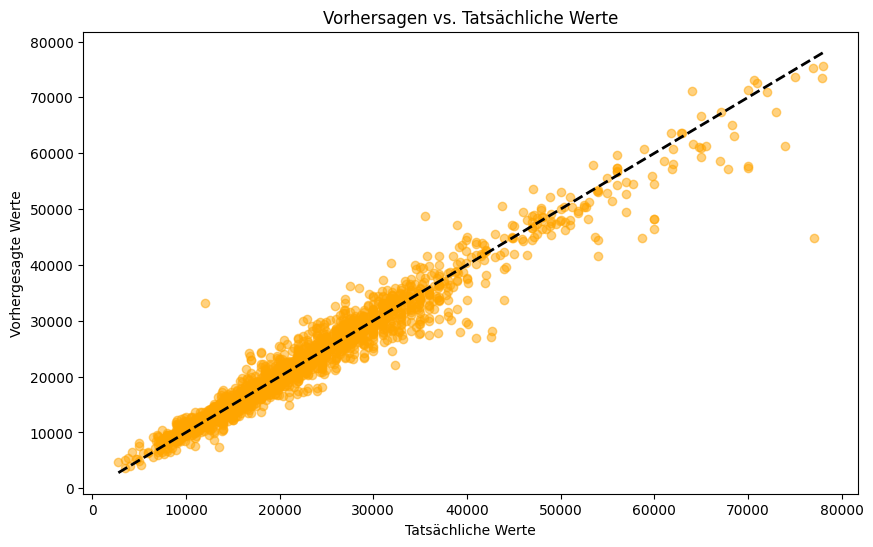

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Vorhersagen vs. Tatsächliche Werte")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.show()